**CIFAR-10 Classification Model**(**ASSIGNMENT 5**)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf

In [ ]:
from keras.datasets import cifar10

In [ ]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [ ]:
data = ["Airplane","Car","Bird","Cat","Deer","Dog","Frog","Horse","Ship", "Truck"]

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0
print(X_train.shape,X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


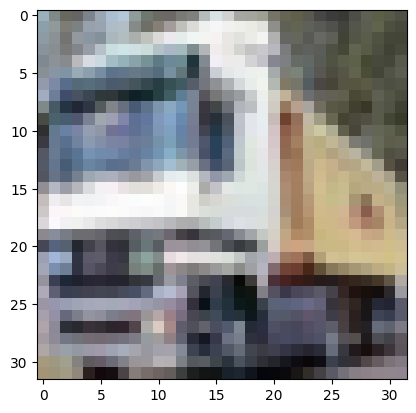

In [ ]:
plt.imshow(X_train[1])

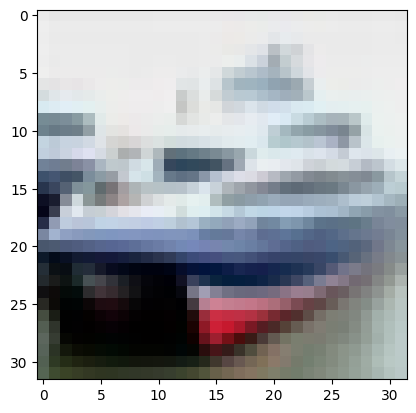

In [ ]:
plt.imshow(X_test[1])

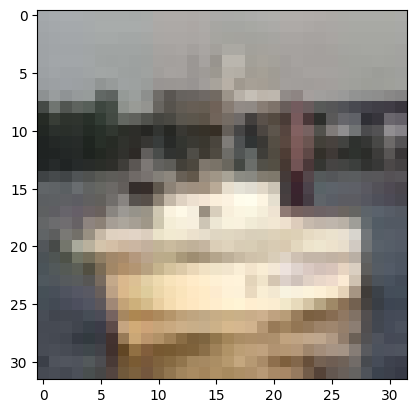

In [ ]:
plt.imshow(X_train[216])

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [ ]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 362s 229ms/step - loss: 1.4126 - accuracy: 0.4899
Epoch 2/5
1563/1563 [==============================] - 347s 222ms/step - loss: 1.0035 - accuracy: 0.6444
Epoch 3/5
1563/1563 [==============================] - 342s 219ms/step - loss: 0.8508 - accuracy: 0.6969
Epoch 4/5
1563/1563 [==============================] - 325s 208ms/step - loss: 0.7529 - accuracy: 0.7348
Epoch 5/5
1563/1563 [==============================] - 341s 218ms/step - loss: 0.6863 - accuracy: 0.7579


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)


313/313 [==============================] - 16s 51ms/step - loss: 0.7131 - accuracy: 0.7578
Test accuracy: 0.7577999830245972


**Text Classification using RNN**(**ASSIGNMENT 6**)

In [ ]:
con=pd.read_csv('/content/drive/MyDrive/connsumerComplaintsSmall.csv')

In [ ]:
con.head()


Unnamed: 0 Date received  \
0           1    21-11-2022   
1           2    21-11-2022   
2           3    21-11-2022   
3           4    21-11-2022   
4           5    15-11-2022   

                                             Product  \
0                                           Mortgage   
1  Credit reporting, credit repair services, or o...   
2  Credit reporting, credit repair services, or o...   
3  Credit reporting, credit repair services, or o...   
4  Credit reporting, credit repair services, or o...   

                  Sub-product  \
0  Conventional home mortgage   
1            Credit reporting   
2            Credit reporting   
3            Credit reporting   
4            Credit reporting   

                                               Issue  \
0                         Struggling to pay mortgage   
1                        Improper use of your report   
2                        Improper use of your report   
3  Problem with a credit reporting company's inve...   
4               Incorrect information on your report   

                                           Sub-issue  \
0                                                NaN   
1      Reporting company used your report improperly   
2      Reporting company used your report improperly   
3  Their investigation did not fix an error on yo...   
4                Information belongs to someone else   

  Consumer complaint narrative  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN

In [ ]:
con.columns

Index(['Unnamed: 0', 'Date received', 'Product', 'Sub-product', 'Issue',
       'Sub-issue', 'Consumer complaint narrative'],
      dtype='object')

In [ ]:
con.describe()

Unnamed: 0
count  101.000000
mean    51.000000
std     29.300171
min      1.000000
25%     26.000000
50%     51.000000
75%     76.000000
max    101.000000

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical


In [ ]:
texts = con['Consumer complaint narrative'].fillna('')
labels = con['Product']


In [ ]:
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
sequences_padded = pad_sequences(sequences, maxlen=max_len)

In [ ]:
label_to_index = {label: index for index, label in enumerate(set(labels))}
labels_encoded = [label_to_index[label] for label in labels]
labels_categorical = to_categorical(labels_encoded)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sequences_padded, labels_categorical, test_size=0.2, random_state=42)


In [ ]:
model = Sequential()
model.add(Embedding(max_words, 64, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(len(label_to_index), activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
2/2 [==============================] - 4s 686ms/step - loss: 1.9597 - accuracy: 0.0417 - val_loss: 1.9208 - val_accuracy: 0.6250
Epoch 2/10
2/2 [==============================] - 0s 124ms/step - loss: 1.8979 - accuracy: 0.8194 - val_loss: 1.8739 - val_accuracy: 0.6250
Epoch 3/10
2/2 [==============================] - 0s 118ms/step - loss: 1.8342 - accuracy: 0.8194 - val_loss: 1.8186 - val_accuracy: 0.6250
Epoch 4/10
2/2 [==============================] - 0s 112ms/step - loss: 1.7614 - accuracy: 0.8194 - val_loss: 1.7445 - val_accuracy: 0.6250
Epoch 5/10
2/2 [==============================] - 0s 125ms/step - loss: 1.6614 - accuracy: 0.8194 - val_loss: 1.6334 - val_accuracy: 0.6250
Epoch 6/10
2/2 [==============================] - 0s 116ms/step - loss: 1.5078 - accuracy: 0.8194 - val_loss: 1.4558 - val_accuracy: 0.6250
Epoch 7/10
2/2 [==============================] - 0s 126ms/step - loss: 1.2621 - accuracy: 0.8194 - val_loss: 1.2381 - val_accuracy: 0.6250
Epoch 8/10
2/2 [====

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)

1/1 [==============================] - 0s 43ms/step - loss: 1.2030 - accuracy: 0.7619
Test accuracy: 0.761904776096344


**SENTIMENT ANALYSIS**(**Assignment7**)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/emotion-labels-train.csv')

In [ ]:
test_data=pd.read_csv('/content/drive/MyDrive/emotion-labels-test.csv')

In [ ]:
train_data.head()

text label
0  Just got back from seeing @GaryDelaney in Burs...   joy
1  Oh dear an evening of absolute hilarity I don'...   joy
2  Been waiting all week for this game ❤️❤️❤️ #ch...   joy
3  @gardiner_love : Thank you so much, Gloria! Yo...   joy
4  I feel so blessed to work with the family that...   joy

In [ ]:
X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']

In [ ]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [ ]:
max_seq_length = 100
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_train = pad_sequences(X_train, maxlen=max_seq_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_seq_length, padding='post')

In [ ]:
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_seq_length))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
batch_size = 32
num_epochs = 10
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=num_epochs, batch_size=batch_size)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Epoch 1/10
113/113 [==============================] - 113s 916ms/step - loss: 1.2977 - accuracy: 0.3723 - val_loss: 1.0671 - val_accuracy: 0.5379
Epoch 2/10
113/113 [==============================] - 109s 960ms/step - loss: 0.4901 - accuracy: 0.8143 - val_loss: 0.8351 - val_accuracy: 0.7269
Epoch 3/10
113/113 [==============================] - 104s 920ms/step - loss: 0.1520 - accuracy: 0.9543 - val_loss: 0.8415 - val_accuracy: 0.7333
Epoch 4/10
113/113 [==============================] - 107s 953ms/step - loss: 0.0939 - accuracy: 0.9759 - val_loss: 0.9119 - val_accuracy: 0.7409
Epoch 5/10
113/113 [==============================] - 102s 910ms/step - loss: 0.0766 - accuracy: 0.9812 - val_loss: 1.0707 - val_accuracy: 0.7107
Epoch 6/10
113/113 [==============================] - 107s 946ms/step - loss: 0.0671 - accuracy: 0.9795 - val_loss: 0.9526 - val_accuracy: 0.7428
Epoch 7/10
113/113 [==============================] - 103s 916ms/step - loss: 0.0601 - accuracy: 0.9798 - val_loss: 0.9509 -

In [49]:

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)


y_test_emotions = label_encoder.inverse_transform(y_test)
y_pred_emotions = label_encoder.inverse_transform(y_pred_labels)

print(classification_report(y_test_emotions, y_pred_emotions))

99/99 [==============================] - 23s 211ms/step
              precision    recall  f1-score   support

       anger       0.70      0.78      0.74       760
        fear       0.72      0.73      0.72       995
         joy       0.90      0.71      0.79       714
     sadness       0.66      0.71      0.69       673

    accuracy                           0.73      3142
   macro avg       0.74      0.73      0.73      3142
weighted avg       0.74      0.73      0.73      3142

